# Agrupamento simples: K-Means
O K-Means é um dos algoritmos de cluster mais populares. Ele identifica K "centróides" que são usados para definir Clusters. Considera-se que um ponto está em um cluster específico se estiver mais próximo do percentil desse cluster do que qualquer outro centróide.



## Clustering Iris Dataset
Vamos utilizar o k-means para clusterizar os dados do dataset iris

In [2]:
# Carrega os dados 
from sklearn.datasets import load_iris
iris = load_iris()

# Imprime a descrição
print(iris.DESCR)



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data = iris.data
print("Número de amostras:", data.shape[0])
print("Número de atributos:", data.shape[1])

Número de amostras: 150
Número de atributos: 4


In [4]:
from matplotlib import pyplot as plt 

def plot_iris(X, y, x_axis, legend):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        start = True
        for xs in X[y == i]:
            if start:
                ax.plot(xs,'o-', c=colors[i], label=legend[i])
                start = False
            else:
                ax.plot(xs, 'o-', c=colors[i])
    plt.xticks(range(len(x_axis)), x_axis, size='small')
    plt.legend()
    plt.show()

def plot_iris_scatter(X, y, axis, legend, col1, col2):
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        xs = X[:, col1][y == i]
        ys = X[:, col2][y == i]
        plt.scatter(xs, ys, c = colors[i])
    plt.legend(legend)
    plt.xlabel(axis[col1])
    plt.ylabel(axis[col2])
    plt.show()

plot_iris(iris.data, iris.target, iris.feature_names, iris.target_names)



<Figure size 640x480 with 1 Axes>

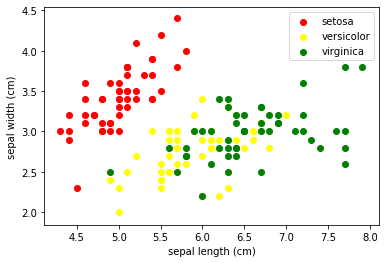

In [5]:
# Visualização com atributos 0 e 1 
plot_iris_scatter(iris.data, iris.target, iris.feature_names, 
                  iris.target_names,0, 1 )

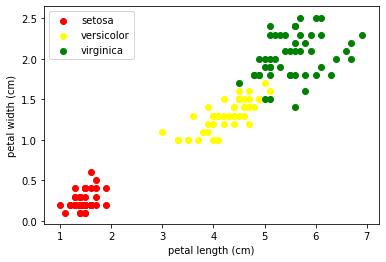

In [6]:
# Visualização com atributos 2 e 3


plot_iris_scatter(iris.data, iris.target, iris.feature_names, 
                  iris.target_names,2, 3 )

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Utilize train_test_split para dividir os dados 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.25, 
                                                    random_state=40)
# Utilize o K-Means para clusterizar os dados. 
X = X_train[:,2:]
kmeans = KMeans( n_clusters=3, random_state=42 )
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

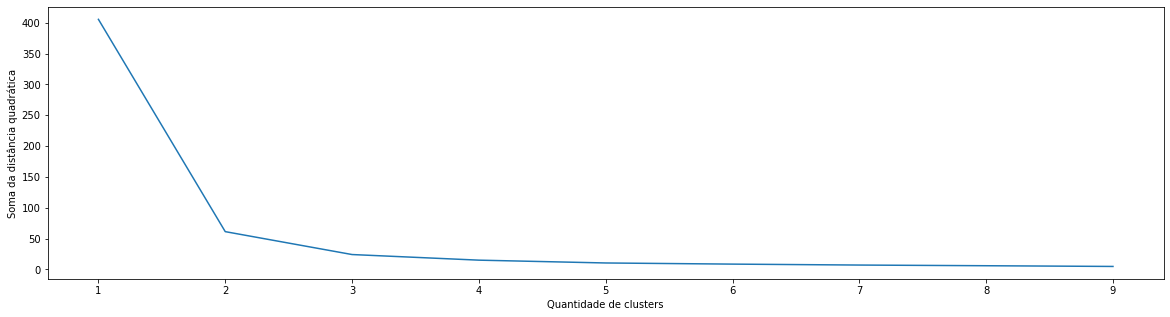

In [20]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

#AVALIAÇÃO DOS PARAMETROS ATRAVÉS DO MÉTODO DO COTOVELO
#De 1 a 10 clusters, no caso.
plt.figure(figsize=(20, 5))
plt.plot(list_k, sse)
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma da distância quadrática');

In [9]:
def plot_iris_clusters(clf, X, y, axis, legend, loc='lower right'):
    h = .01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    a = np.c_[xx.ravel(), yy.ravel()]
    z = clf.predict(a)
    z = z.reshape(xx.shape)
    plt.imshow(z, interpolation='nearest', 
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect='auto', origin='lower')
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        xs = X[:, 0][y == i]
        ys = X[:, 1][y == i]
        plt.scatter(xs, ys, c = colors[i])
    plt.legend(legend, loc=loc)
    plt.xlabel(axis[0])
    plt.ylabel(axis[1])

    centroids = clf.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='.',
                s=169, linewidths=3, color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


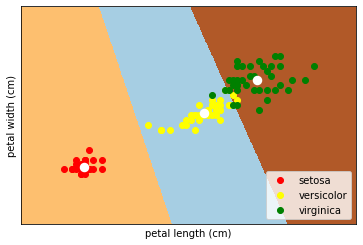

In [10]:
import numpy as np 

# Utilize a função plot_iris_clusters com os dados da aprendizagem para visualizar os clusters
plot_iris_clusters(kmeans, X, y_train, iris.feature_names[2:],
                  iris.target_names)

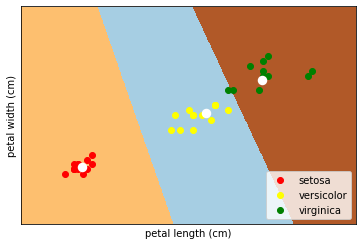

In [11]:
# Utilize a função plot_iris_clusters com os dados de teste para visualizar os clusters
X_eval = X_test[:,2:]
plot_iris_clusters(kmeans, X_eval, y_test, iris.feature_names[2:],
                  iris.target_names)